In [ ]:
#plotly------>interactive graphs
! pip install plotly


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go



In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%matplotlib inline
#we can open graph in diff window

In [ ]:
#pd.read_csv("filename.csv")
#pd.read_csv("path")

In [ ]:
df=pd.read_csv("covid_19_clean_complete.csv",parse_dates=["Date"])
#we are concentrating on date column---->important column
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [ ]:
#rename()---->pandas
df.rename(columns={'Date':'date',
                  'Province/State':'state',
                  'Country/Region':'country',
                  'Lat':'lat',
                  'Long	':'long',
                  'Confirmed':'confirmed',
                  'Deaths':'deaths',
                  'Recovered':'recovered'},
         inplace=True)

In [ ]:
df.head()

,state,country,lat,Long,date,confirmed,deaths,recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [ ]:
#active cases
#active=confirmed-deaths-recovered
#10-2-2
#6----->active cases for the day
df['active']=df['confirmed']-df['deaths']-df['recovered']

In [ ]:
df.head()

,state,country,lat,Long,date,confirmed,deaths,recovered,active
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0,2.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0,2.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0,0.0


In [ ]:
df.tail()

,state,country,lat,Long,date,confirmed,deaths,recovered,active
19215,NaN,Jersey,49.1900,-2.110,2020-03-23,0.0,0.0,0.0,0.0
19216,NaN,Puerto Rico,18.2000,-66.500,2020-03-23,0.0,1.0,0.0,-1.0
19217,NaN,Republic of the Congo,-1.4400,15.556,2020-03-23,0.0,0.0,0.0,0.0
19218,NaN,The Bahamas,24.2500,-76.000,2020-03-23,0.0,0.0,0.0,0.0
19219,NaN,The Gambia,13.4667,-16.600,2020-03-23,0.0,0.0,0.0,0.0


In [ ]:
top= df[df['date']==df['date'].max()]
top.head()

,state,country,lat,Long,date,confirmed,deaths,recovered,active
18910,NaN,Thailand,15.0000,101.0000,2020-03-23,599.0,1.0,44.0,554.0
18911,NaN,Japan,36.0000,138.0000,2020-03-23,1086.0,40.0,235.0,811.0
18912,NaN,Singapore,1.2833,103.8333,2020-03-23,455.0,2.0,144.0,309.0
18913,NaN,Nepal,28.1667,84.2500,2020-03-23,2.0,0.0,1.0,1.0
18914,NaN,Malaysia,2.5000,112.5000,2020-03-23,1306.0,10.0,139.0,1157.0


In [ ]:
#combining the latest date from the countries

In [ ]:
world=top.groupby('country')['confirmed','active','deaths'].sum().reset_index()

#start indexing from 0


In [ ]:
world.head()

,country,confirmed,active,deaths
0,Afghanistan,40.0,38.0,1.0
1,Albania,89.0,85.0,2.0
2,Algeria,201.0,119.0,17.0
3,Andorra,113.0,111.0,1.0
4,Angola,2.0,2.0,0.0


In [ ]:
figure=px.choropleth(world,locations='country',
                    locationmode='country names',color='active',
                    hover_name='country',range_color=[1,1000],
                    color_continuous_scale="viridis",
                    title="countries with active cases")
figure.show()

In [ ]:
total_cases=df.groupby('date')['date','confirmed'].sum().reset_index()

In [ ]:
total_cases.head()

,date,confirmed
0,2020-01-22,554.0
1,2020-01-23,652.0
2,2020-01-24,939.0
3,2020-01-25,1432.0
4,2020-01-26,2113.0


In [ ]:
#ploting for confirmed cases

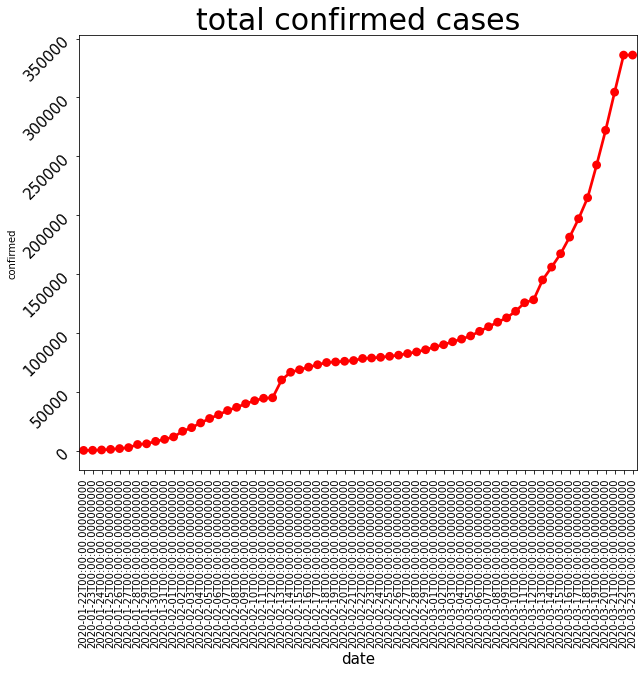

In [ ]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(rotation=45,fontsize=15)
plt.xlabel("dates",fontsize=15)
plt.ylabel("confirmed cases")
plt.title("total confirmed cases",fontsize=30)
ax=sns.pointplot(x=total_cases.date, y=total_cases.confirmed,color='r')



In [ ]:
#top active countries
top_active=top.groupby('country')['active'].sum().sort_values(ascending=False).head(20).reset_index()

In [ ]:
top_active

,country,active
0,Italy,46638.0
1,US,32681.0
2,Germany,24513.0
3,Spain,24421.0
4,France,13170.0
5,Iran,12022.0
6,Switzerland,7016.0
7,South Korea,5884.0
8,United Kingdom,5392.0
9,China,5351.0


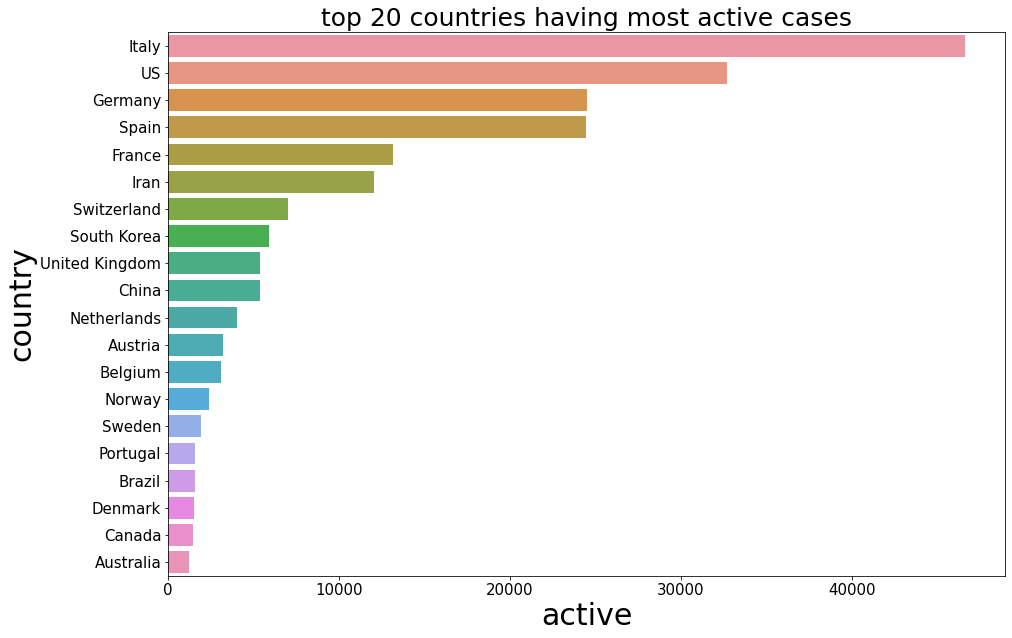

In [ ]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("total cases",fontsize=30)
plt.ylabel("country",fontsize=30)
plt.title("top 20 countries having most active cases",fontsize=25)


ax=sns.barplot(x=top_active.active,y=top_active.country)



In [ ]:
#particular countries

In [ ]:
china=df[df.country=='China']
china

,state,country,lat,long,date,confirmed,deaths,recovered,active
154,Hubei,China,30.9756,112.2707,2020-01-22,444.0,17.0,28.0,399.0
158,Guangdong,China,23.3417,113.4244,2020-01-22,26.0,0.0,0.0,26.0
159,Henan,China,33.8820,113.6140,2020-01-22,5.0,0.0,0.0,5.0
160,Zhejiang,China,29.1832,120.0934,2020-01-22,10.0,0.0,0.0,10.0
161,Hunan,China,27.6104,111.7088,2020-01-22,4.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...
19098,Inner Mongolia,China,44.0935,113.9448,2020-03-23,75.0,1.0,74.0,0.0
19099,Ningxia,China,37.2692,106.1655,2020-03-23,75.0,0.0,75.0,0.0
19103,Qinghai,China,35.7452,95.9956,2020-03-23,18.0,0.0,18.0,0.0
19104,Macau,China,22.1667,113.5500,2020-03-23,24.0,0.0,10.0,14.0


In [ ]:
china=china.groupby('date')['recovered','deaths','confirmed','active'].sum().reset_index()
china.head()

,date,recovered,deaths,confirmed,active
0,2020-01-22,28.0,17.0,548.0,503.0
1,2020-01-23,30.0,18.0,643.0,595.0
2,2020-01-24,36.0,26.0,920.0,858.0
3,2020-01-25,39.0,42.0,1406.0,1325.0
4,2020-01-26,49.0,56.0,2075.0,1970.0


In [ ]:
us=df[df.country=='US']

us

,state,country,lat,long,date,confirmed,deaths,recovered,active
98,Washington,US,47.4009,-121.4905,2020-01-22,0.0,0.0,0.0,0.0
99,New York,US,42.1657,-74.9481,2020-01-22,0.0,0.0,0.0,0.0
100,California,US,36.1162,-119.6816,2020-01-22,0.0,0.0,0.0,0.0
101,Massachusetts,US,42.2302,-71.5301,2020-01-22,0.0,0.0,0.0,0.0
102,Diamond Princess,US,35.4437,139.6380,2020-01-22,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
19136,Puerto Rico,US,18.2208,-66.5901,2020-03-23,23.0,1.0,0.0,22.0
19150,Guam,US,13.4443,144.7937,2020-03-23,27.0,1.0,0.0,26.0
19167,Virgin Islands,US,18.3358,-64.8963,2020-03-23,NaN,NaN,NaN,NaN
19210,United States Virgin Islands,US,18.3358,-64.8963,2020-03-23,6.0,0.0,0.0,6.0


In [ ]:
us=us.iloc[33:].reset_index().drop('index',axis=1)


In [ ]:
us.head(50)

,state,country,lat,long,date,confirmed,deaths,recovered,active
0,Florida,US,27.7663,-81.6868,2020-01-23,0.0,0.0,0.0,0.0
1,New Jersey,US,40.2989,-74.5210,2020-01-23,0.0,0.0,0.0,0.0
2,Oregon,US,44.5720,-122.0709,2020-01-23,0.0,0.0,0.0,0.0
3,Texas,US,31.0545,-97.5635,2020-01-23,0.0,0.0,0.0,0.0
4,Illinois,US,40.3495,-88.9861,2020-01-23,0.0,0.0,0.0,0.0
5,Pennsylvania,US,40.5908,-77.2098,2020-01-23,0.0,0.0,0.0,0.0
6,Iowa,US,42.0115,-93.2105,2020-01-23,0.0,0.0,0.0,0.0
7,Maryland,US,39.0639,-76.8021,2020-01-23,0.0,0.0,0.0,0.0
8,North Carolina,US,35.6301,-79.8064,2020-01-23,0.0,0.0,0.0,0.0
9,South Carolina,US,33.8569,-80.9450,2020-01-23,0.0,0.0,0.0,0.0


In [ ]:
#italy

In [ ]:
italy=df[df.country=='Italy']

In [ ]:
italy=italy.groupby('date')['recovered','deaths','confirmed','active'].sum().reset_index()
italy.head(20)

,date,recovered,deaths,confirmed,active
0,2020-01-22,0.0,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0,0.0
5,2020-01-27,0.0,0.0,0.0,0.0
6,2020-01-28,0.0,0.0,0.0,0.0
7,2020-01-29,0.0,0.0,0.0,0.0
8,2020-01-30,0.0,0.0,0.0,0.0
9,2020-01-31,0.0,0.0,2.0,2.0


In [ ]:
italy=italy.iloc[9:].reset_index().drop('index',axis=1)

In [ ]:
italy.head()

,date,recovered,deaths,confirmed,active
0,2020-01-31,0.0,0.0,2.0,2.0
1,2020-02-01,0.0,0.0,2.0,2.0
2,2020-02-02,0.0,0.0,2.0,2.0
3,2020-02-03,0.0,0.0,2.0,2.0
4,2020-02-04,0.0,0.0,2.0,2.0


In [ ]:
india=df[df.country=='India']

In [ ]:
india

,state,country,lat,long,date,confirmed,deaths,recovered,active
15,NaN,India,21.0,78.0,2020-01-22,0.0,0.0,0.0,0.0
325,NaN,India,21.0,78.0,2020-01-23,0.0,0.0,0.0,0.0
635,NaN,India,21.0,78.0,2020-01-24,0.0,0.0,0.0,0.0
945,NaN,India,21.0,78.0,2020-01-25,0.0,0.0,0.0,0.0
1255,NaN,India,21.0,78.0,2020-01-26,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
17685,NaN,India,21.0,78.0,2020-03-19,194.0,4.0,15.0,175.0
17995,NaN,India,21.0,78.0,2020-03-20,244.0,5.0,20.0,219.0
18305,NaN,India,21.0,78.0,2020-03-21,330.0,4.0,23.0,303.0
18615,NaN,India,21.0,78.0,2020-03-22,396.0,7.0,27.0,362.0


In [ ]:
india=india.groupby('date')['recovered','deaths','confirmed','active'].sum().reset_index()

In [ ]:
india.head(10)

,date,recovered,deaths,confirmed,active
0,2020-01-22,0.0,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0,0.0
5,2020-01-27,0.0,0.0,0.0,0.0
6,2020-01-28,0.0,0.0,0.0,0.0
7,2020-01-29,0.0,0.0,0.0,0.0
8,2020-01-30,0.0,0.0,1.0,1.0
9,2020-01-31,0.0,0.0,1.0,1.0


In [ ]:
india=india.iloc[8:].reset_index().drop('index',axis=1)

In [ ]:
india.head()

,date,recovered,deaths,confirmed,active
0,2020-01-30,0.0,0.0,1.0,1.0
1,2020-01-31,0.0,0.0,1.0,1.0
2,2020-02-01,0.0,0.0,1.0,1.0
3,2020-02-02,0.0,0.0,2.0,2.0
4,2020-02-03,0.0,0.0,3.0,3.0


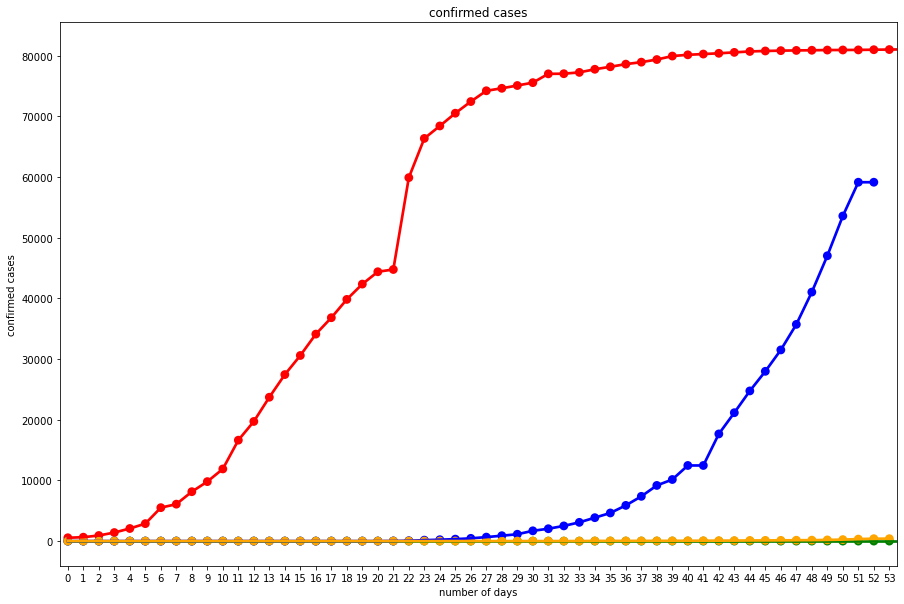

In [ ]:
plt.figure(figsize=(15,10))
sns.pointplot(china.index,china.confirmed,color='red')
sns.pointplot(us.index,us.confirmed,color='green')
sns.pointplot(italy.index,italy.confirmed,color='blue')
sns.pointplot(india.index,india.confirmed,color='orange')
plt.title("confirmed cases")
plt.xlabel("number of days")
plt.ylabel("confirmed cases")
plt.show()

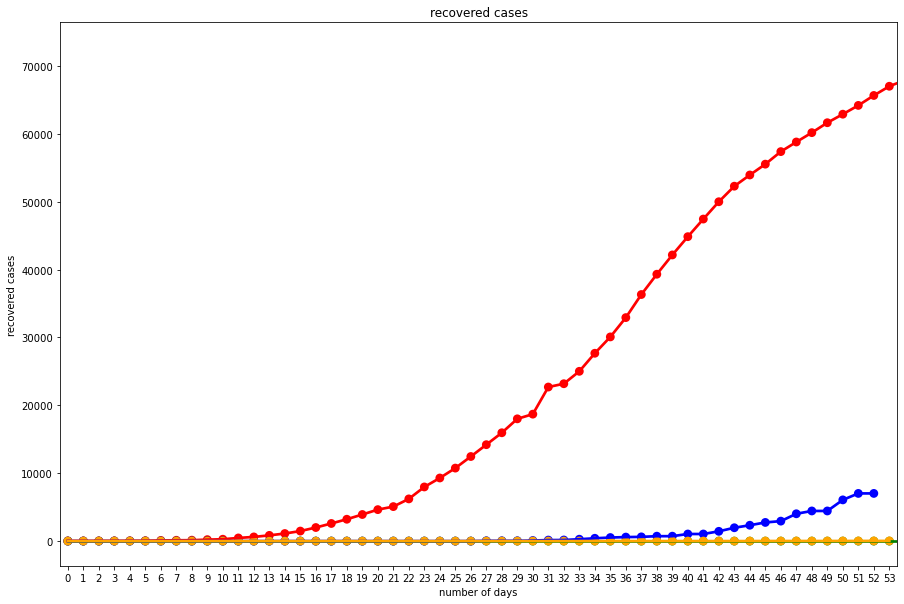

In [ ]:
plt.figure(figsize=(15,10))
sns.pointplot(china.index,china.recovered,color='red')
sns.pointplot(us.index,us.recovered,color='green')
sns.pointplot(italy.index,italy.recovered,color='blue')
sns.pointplot(india.index,india.recovered,color='orange')
plt.title("recovered cases")
plt.xlabel("number of days")
plt.ylabel("recovered cases")
plt.show()

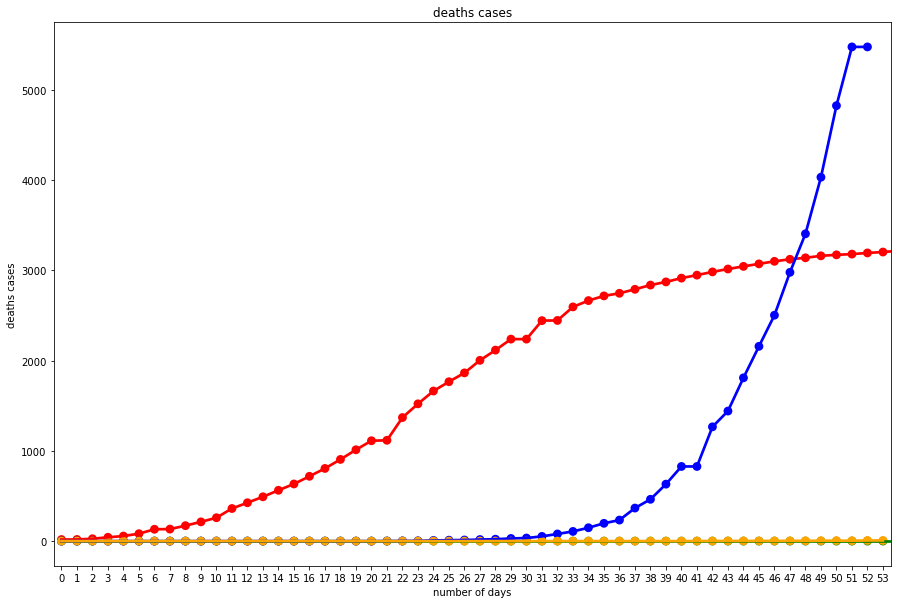

In [ ]:
plt.figure(figsize=(15,10))
sns.pointplot(china.index,china.deaths,color='red')
sns.pointplot(us.index,us.deaths,color='green')
sns.pointplot(italy.index,italy.deaths,color='blue')
sns.pointplot(india.index,india.deaths,color='orange')
plt.title("deaths cases")
plt.xlabel("number of days")
plt.ylabel("deaths cases")
plt.show()

In [ ]:
#only for Indian states

In [ ]:
df_india=pd.read_excel('covid_19_india.xlsx')

In [ ]:
df_india.head()

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,9,0,0,0
1,2,Bihar,3,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,32,1,0,1


In [ ]:
df_india['total active']=df_india['Total Confirmed cases ( Foreign National )']+ df_india['Total Confirmed cases (Indian National)']

In [ ]:
df_india['active']=df_india['total active']-(df_india['Death']-df_india['Cured'])

In [ ]:
total_active=df_india['total active'].sum()

In [ ]:
top_cases=df_india.groupby('Name of State / UT')['total active'].sum().sort_values(ascending=False).reset_index()

In [ ]:
top_cases.style.background_gradient(cmap='hot_r')

,Name of State / UT,total active
0,Kerala,109
1,Maharashtra,101
2,Karnataka,41
3,Uttar Pradesh,35
4,Telengana,35
5,Gujarat,33
6,Rajasthan,32
7,Delhi,31
8,Punjab,29
9,Haryana,28
